In [31]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import more_itertools as mit
from scipy import interpolate

In [32]:
df = read_csv('2kg(2).csv')
df.head()

,Unnamed: 0,Load Cell 1,Load Cell 2,Load Cell 3,Load Cell 4
0,0,150550,157438,-8081,301578
1,1,150585,157232,-7919,301522
2,2,150279,157328,-7971,301630
3,3,150399,157469,-8056,301707
4,4,150431,157475,-8161,301636


In [33]:
col = 'Load Cell 1'
y = df[col]
y.head()

0    150550
1    150585
2    150279
3    150399
4    150431
Name: Load Cell 1, dtype: object

In [34]:
y = y.replace(to_replace='False', value=np.nan).map(float)
x = np.linspace(0, len(y)-1, len(y))

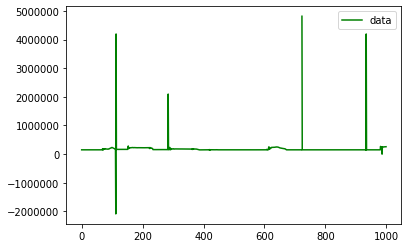

In [35]:
plt.plot(x,y,'g',label='data')
plt.legend()
plt.show()

In [36]:
threshold_param = 1E6
too_big = np.where(abs(y)>threshold_param)[0]
too_big

array([112, 113, 284, 723, 934], dtype=int64)

In [37]:
NaNs = np.where(np.isnan(y))[0]
NaNs

array([722, 932, 983], dtype=int64)

In [38]:
big_and_nans = np.sort(np.unique(np.concatenate((too_big, NaNs)))) 
big_and_nans

array([112, 113, 284, 722, 723, 932, 934, 983], dtype=int64)

### Need to determine whether to remove the obvious big data before or after derivatives taken

but this is what it looks like with spikes removed:

In [39]:
temp_y = np.copy(y)
for positions in big_and_nans:
    temp_y[positions] = np.nan

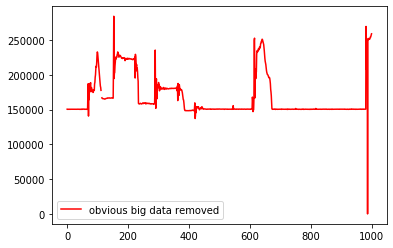

In [41]:
plt.plot(x,temp_y,'r',label='obvious big data removed')
plt.legend()
plt.show()

### remove before: